In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline
from PIL import Image 


In [15]:
cd /Users/austinmcdonald/Desktop/7-31-17

/Users/austinmcdonald/Desktop/7-31-17


In [16]:
os.listdir()

['1s-sphere-1.tif',
 '1s-sphere-2.tif',
 '1s-sphere-3.tif',
 '1s-sphere-4.tif',
 '1s-sphere-5.tif',
 '1s-sphere-nice.tif',
 '1s-sphere-niceo.tif',
 'face.tif',
 'faceo.tif',
 'sample2.tif']

In [17]:
im = Image.open('faceo.tif')
im.show()

In [18]:
Imdat = np.array(im)


In [10]:
maxx=[]
for x in range(0,2048):
    maxx.append(max(Imdat[x]))
max(maxx)

65535

In [25]:
Row = 18
Col = 18
Xindex = 244 
Yindex = 356
Image = Imdat[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]

In [21]:
testx=np.arange(0,41)

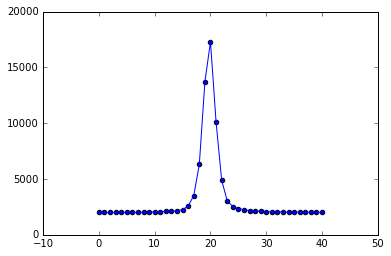

In [22]:
plt.scatter(testx,Image[19])
plt.plot(testx,Image[19])

plt.show()

In [28]:
np.argmax(Image[19])

19

In [56]:
ImageIntensity= Image[19][19:41]
Pixel = (np.arange(19,41)-19)*16e-6

In [57]:
ImageIntensity

array([8437, 6140, 3416, 2513, 2286, 2190, 2123, 2102, 2074, 2048, 2024,
       2030, 2029, 2018, 2022, 2010, 2012, 2008, 2016, 2000, 2008, 2008], dtype=uint16)

In [60]:
Pixel

array([  0.00000000e+00,   1.60000000e-05,   3.20000000e-05,
         4.80000000e-05,   6.40000000e-05,   8.00000000e-05,
         9.60000000e-05,   1.12000000e-04,   1.28000000e-04,
         1.44000000e-04,   1.60000000e-04,   1.76000000e-04,
         1.92000000e-04,   2.08000000e-04,   2.24000000e-04,
         2.40000000e-04,   2.56000000e-04,   2.72000000e-04,
         2.88000000e-04,   3.04000000e-04,   3.20000000e-04,
         3.36000000e-04])

In [61]:
Depth = np.sqrt((220e-9)**2-(Pixel)**2)

In [62]:
Depth

array([  2.20000000e-07,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan])

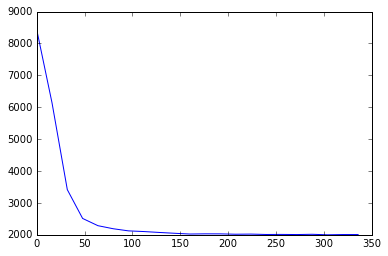

In [59]:
plt.plot(Pixel*1e6,ImageIntensity)

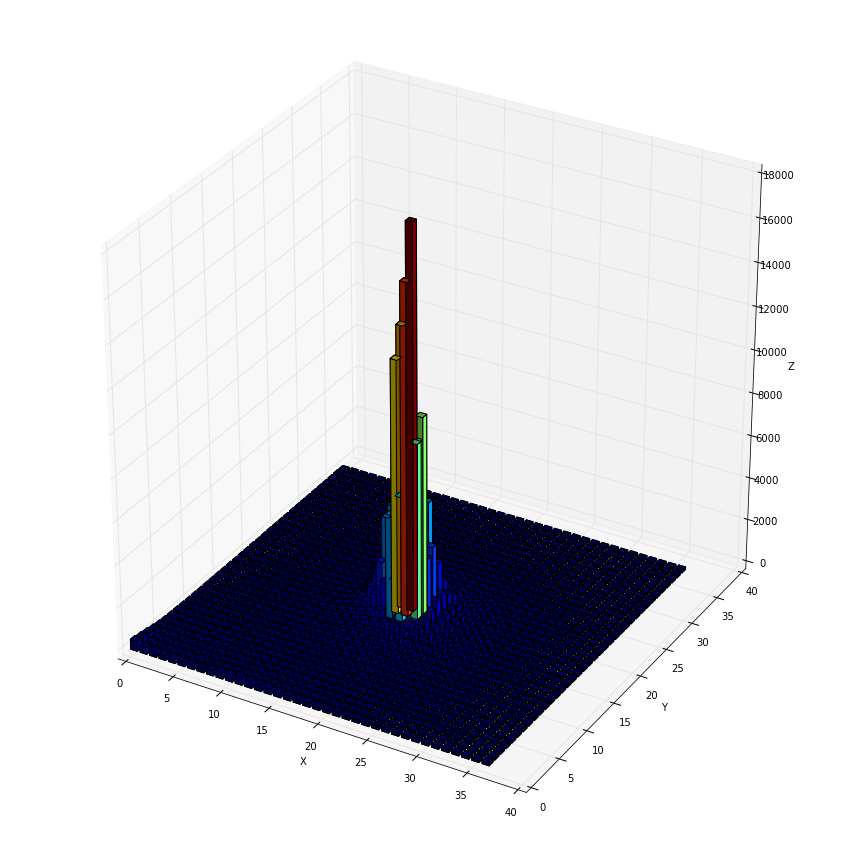

In [27]:
from mpl_toolkits.mplot3d import Axes3D

data = Image-1900


ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()   
ypos = ypos.flatten()
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(data.flatten()/float(data.max()))
ax.bar3d(xpos,ypos,zpos, .7,.7,data.flatten(), color=colors)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.savefig('/Users/austinmcdonald/Desktop/7-31-17/FaceoInt.pdf')

plt.show()